In [62]:
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def setup_logging() -> None:
    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(funcName)s | %(message)s',
        handlers=[
            logging.FileHandler("81-ipynb.log")
        ]
    )

    logging.info('Logging setup complete.')


def fetch_df(file_path: str) -> pd.DataFrame:
    logging.info('Initiating reading file: {file_path}')

    try:
        in_df = pd.read_csv(file_path, index_col=0)
    except FileNotFoundError as notfound_err:
        logging.error(f'Faile not found at: {file_path}. Error: {notfound_err}')
        raise notfound_err
    except pd.errors.EmptyDataError as empty_err:
        logging.error(f'File empty at: {file_path}. Error: {empty_err}')
        raise empty_err
    except pd.errors.ParserError as parse_err:
        logging.error(f'File parsing error: {parse_err}')
        raise parse_err
    except Exception as e:
        logging.error(f'An unexpected error occurred: {e}')
        raise e
    else:
        logging.info(f'File read successfuly.')
        pd.options.display.float_format = '{:,.2f}'.format
        return in_df

# Preliminary Data Exploration 🔎

In [63]:
def pleliminary_df_exploration(in_df: pd.DataFrame) -> None:
    logging.info('Starting preliminary DataFrame exploration.')

    print(f'DataFrame shape: {in_df.shape}')
    print(f'Columns: {in_df.columns.tolist()}')
    print(f'NaN: {in_df.isna().values.any()}')
    print(f'Duplicate: {in_df.duplicated().values.any()}')
    print(f'Data types:\n{in_df.dtypes}')

    logging.info('DataFrame exploration complete.')


if __name__== '__main__':
    setup_logging()
    logging.info('Starting script execution')

    in_df = fetch_df('input-81.csv')
    pleliminary_df_exploration(in_df)

DataFrame shape: (506, 14)
Columns: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
NaN: False
Duplicate: False
Data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object


# Descriptive Statistics

In [64]:
# PTRATIO  pupil-teacher ratio by town

if __name__ == '__main__':
    logging.info('Starting data visualization')

    in_df = fetch_df('input-81.csv')
    print(f'Abg student-teacher ratio: {in_df.PTRATIO.mean():.2f}')
    print(f'Avg price of a home: ${in_df.PRICE.mean() * 1000:.2f}')
    print(f'Min and Max of CHAS: {in_df.CHAS.min()} and {in_df.CHAS.max()}')
    print(f'Min and Max of RM: {in_df.RM.min()} and {in_df.RM.max()}')

    print('DF description')
    display(in_df.describe())

Abg student-teacher ratio: 18.46
Avg price of a home: $22532.81
Min and Max of CHAS: 0.0 and 1.0
Min and Max of RM: 3.561 and 8.78
DF description


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Visualize Features

In [65]:
def gen_fig_house_price(in_df: pd.DataFrame) -> None:
    logging.info('Generating house price figure.')
    
    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    sns.displot(
        in_df,
        x='PRICE',
        bins=50,
        aspect=2,
        kde=True,
        color='#2196f3'
    )
    plt.title(f'1970s Home Values in Boston. Avg: ${1000*in_df.PRICE.mean():,.2f}')
    plt.xlabel('Price in $1000')
    plt.ylabel('Count of Homes')
    plt.show()

    logging.info('House price figure generated successfully.')


def gen_fig_distance_work(in_df: pd.DataFrame) -> None:
    logging.info('Generating Distance to Employment Centre figure.')
    
    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    sns.displot(
        in_df,
        x='DIS',
        bins=50,
        aspect=2,
        kde=True,
        color="#2196f3"
    )
    plt.title(f'Weighted Home to Employement Distance. Avg Distance: {in_df.DIS.mean():,.2f}')
    plt.xlabel('Distance to Employment Centre')
    plt.ylabel('Count of Homes')
    plt.show()

    logging.info('House price figure generated successfully.')


def gen_fig_room_per_home(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Rooms per Dwelling.')
    
    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    sns.displot(
        in_df,
        x='RM',
        bins=50,
        aspect=2,
        kde=True,
        color="#2196f3"
    )
    plt.title(f'Avg rooms per home: {in_df.RM.mean():,.1f}')
    plt.xlabel('Rooms per Home')
    plt.ylabel('Count of Homes')
    plt.show()

    logging.info('Rooms per Dwelling figure generated successfully.')


def gen_fig_highway_access(in_df: pd.DataFrame) -> None:
    logging.info(f'Generating figure: Highway Access')
    
    plt.figure(
        figsize=(10, 5),
        dpi=150
    )

    sns.displot(
        data=in_df,
        x='RAD',
        bins=50,
        aspect=2,
        color="#2196f3"
    )
    plt.title(f'Access to Highway. Avg: {in_df.RAD.mean():,.1f}')
    plt.xlabel('Access to Highway')
    plt.ylabel('Count of Homes')
    plt.show()


def gen_fig_river(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: River Access')

    river_access = in_df.CHAS.value_counts().sort_index()
    print(f'River Access df:]\n{river_access}')

    bar = px.bar(
        x=['No', 'Yes'],
        y=river_access.values,
        color=['No', 'Yes'],
        color_discrete_sequence=["#f32121", "#33ff00"],
        labels={'x': 'Property Located Next to the River?', 'y': 'Number of Homes'},
        title='Access to Charles River'
    )
    bar.update_layout(
        xaxis_title='Property Located Next to the River?', 
        yaxis_title='Number of Homes',
        showlegend=False,
        template='plotly_white',
    )
    bar.show()
    logging.info('River Access figure generated successfully.')
    

if __name__ == '__main__':
    setup_logging()

    in_df = fetch_df('input-81.csv')
    # gen_fig_house_price(in_df)
    # gen_fig_distance_work(in_df)
    # gen_fig_room_per_home(in_df)
    # gen_fig_highway_access(in_df)
    gen_fig_river(in_df)

River Access df:]
CHAS
0.00    471
1.00     35
Name: count, dtype: int64


# Relationship in Data

In [66]:
def gen_fig_dis_empvspol(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Distance to Employment vs Pollution.')
    
    with sns.axes_style('darkgrid'):
        plot = sns.jointplot(
            data=in_df,
            x='DIS',
            y='NOX',
            kind='scatter',
            color='blue',
            height=5,
            joint_kws={'alpha': 0.5}
        )
        plot.set_axis_labels(
            xlabel='Distance to Employment Centers (DIS)',
            ylabel='Nitric Oxide Concentration (NOX)',
            fontsize=10
        )
    plt.tight_layout()
    plt.show()

    logging.info('Distance to Employment vs Pollution figure generated successfully.')


def gen_fig_nonretailvspol(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Non-Retail Business Acres vs Pollution.')
    
    with sns.axes_style('darkgrid'):
        plot = sns.jointplot(
            data=in_df,
            x='INDUS',
            y='NOX',
            kind='scatter',
            color='yellow',
            height=5,
            joint_kws={'alpha': 0.5}
        )
        plot.set_axis_labels(
            xlabel='Proportion of Non-Retail Business Acres (INDUS)',
            ylabel='Nitric Oxide Concentration (NOX)',
            fontsize=10
        )
    plt.tight_layout()
    plt.show()

    logging.info('Non-Retail Business Acres vs Pollution figure generated successfully.')


def gen_fig_lstat_vs_rm(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Lower Status of the Population vs Average Number of Rooms.')

    with sns.axes_style('darkgrid'):
        plot = sns.jointplot(
            data=in_df,
            x='LSTAT',
            y='RM',
            kind='reg',
            color='seagreen',
            height=5,
            joint_kws={'scatter_kws': {'alpha': 0.5}}
        )
        plot.set_axis_labels(
            xlabel='Lower Status of the Population (LSTAT)',
            ylabel='Average Number of Rooms per Dwelling (RM)',
            fontsize=10
        )
    plt.tight_layout()
    plt.show()    

    logging.info('Lower Status of the Population vs Average Number of Rooms figure generated successfully.')


def gen_fig_lstat_vs_price(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Lower Income population vs Home Price.')

    with sns.axes_style('darkgrid'):
        plot = sns.jointplot(
            data=in_df,
            x='LSTAT',
            y='PRICE',
            kind='reg',
            color='crimson',
            height=7,
            joint_kws={'scatter_kws': {'alpha': 0.5}}
        )
        plot.set_axis_labels(
            xlabel='Lower Status of the Population (LSTAT)',
            ylabel='Home Price in $1000 (PRICE)',
            fontsize=10
        )
    plt.tight_layout()
    plt.show()

    logging.info('Figure generated successfully.')


def gen_fig_rm_vs_price(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Average Number of Rooms vs Home Price.')

    with sns.axes_style('darkgrid'):
        plot = sns.jointplot(
            data=in_df,
            x='RM',
            y='PRICE',
            kind='reg',
            color='darkblue',
            height=7,
            joint_kws={'scatter_kws': {'alpha': 0.5}}
        )
        plot.set_axis_labels(
            xlabel='Average Number of Rooms per Dwelling (RM)',
            ylabel='Home Price in $1000 (PRICE)',
            fontsize=10
        )
    plt.tight_layout()
    plt.show()

    logging.info('Figure generated successfully.')


if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    logging.info('Initiating data visualization.')

    # sns.pairplot(data=in_df)
    # gen_fig_dis_empvspol(in_df)
    # gen_fig_nonretailvspol(in_df)
    # gen_fig_lstat_vs_rm(in_df)
    # gen_fig_lstat_vs_price(in_df)
    # gen_fig_rm_vs_price(in_df)

    logging.info(f'Data visualization complete.')


# Split Training & Test Dataset

In [67]:
def split_data_train_test(in_df: pd.DataFrame) -> tuple:
    logging.info('Splitting data into training and testing sets.')
    
    target = in_df.PRICE
    feature = in_df.drop(columns=['PRICE'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(
        feature,
        target,
        test_size=0.2,
        random_state=10
    )

    logging.info('Data split complete.')

    train_pct = 100*len(X_train) / len(feature)
    print(f'Training data is {train_pct:.3}% of the total data.')

    test_pct = 100*X_test.shape[0] / feature.shape[0]
    print(f'Test data makes up the remaining {test_pct:0.3}%.')

    logging.info(f'Train set shape: {X_train.shape}, Test set shape: {X_test.shape}')

    return X_train, X_test, y_train, y_test


if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    X_train, X_test, y_train, y_test = split_data_train_test(in_df)

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.


# Multivariable Regression

In [68]:
def train_model(X_train, X_test, y_train, y_test) -> LinearRegression:
    logging.info('Training the regression model.')
    
    regr_model = LinearRegression()
    regr_model.fit(X_train, y_train)
    train_rsquared = regr_model.score(X_train, y_train)
    test_rsquared = regr_model.score(X_test, y_test)

    print(f'Training data R-squared: {train_rsquared*100:.2f}%')
    print(f'Test data R-squared: {test_rsquared*100:.2f}%')

    if abs(train_rsquared - test_rsquared) > 0.2:
        print("Warning: Possible overfitting or underfitting")

    logging.info('Model training complete.')
    return regr_model


if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    X_train, X_test, y_train, y_test = split_data_train_test(in_df)

    regr_model = train_model(X_train, X_test, y_train, y_test)

    # the coefficients of the regression model
    regr_coef = pd.DataFrame(
        data=regr_model.coef_,
        index=X_train.columns,
        columns=['Coefficient']
    )
    print('Regression Coefficients: What changes in the feature will do to the price of a home?')
    display(regr_coef)

    print(f'Price for having a room more: ${regr_coef.loc["RM", "Coefficient"] * 1000:,.5}')

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.
Training data R-squared: 75.01%
Test data R-squared: 67.09%
Regression Coefficients: What changes in the feature will do to the price of a home?


,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


Price for having a room more: $3,108.5


# Analyse the Estimated Values & Regression Residuals

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.
Training data R-squared: 75.01%
Test data R-squared: 67.09%


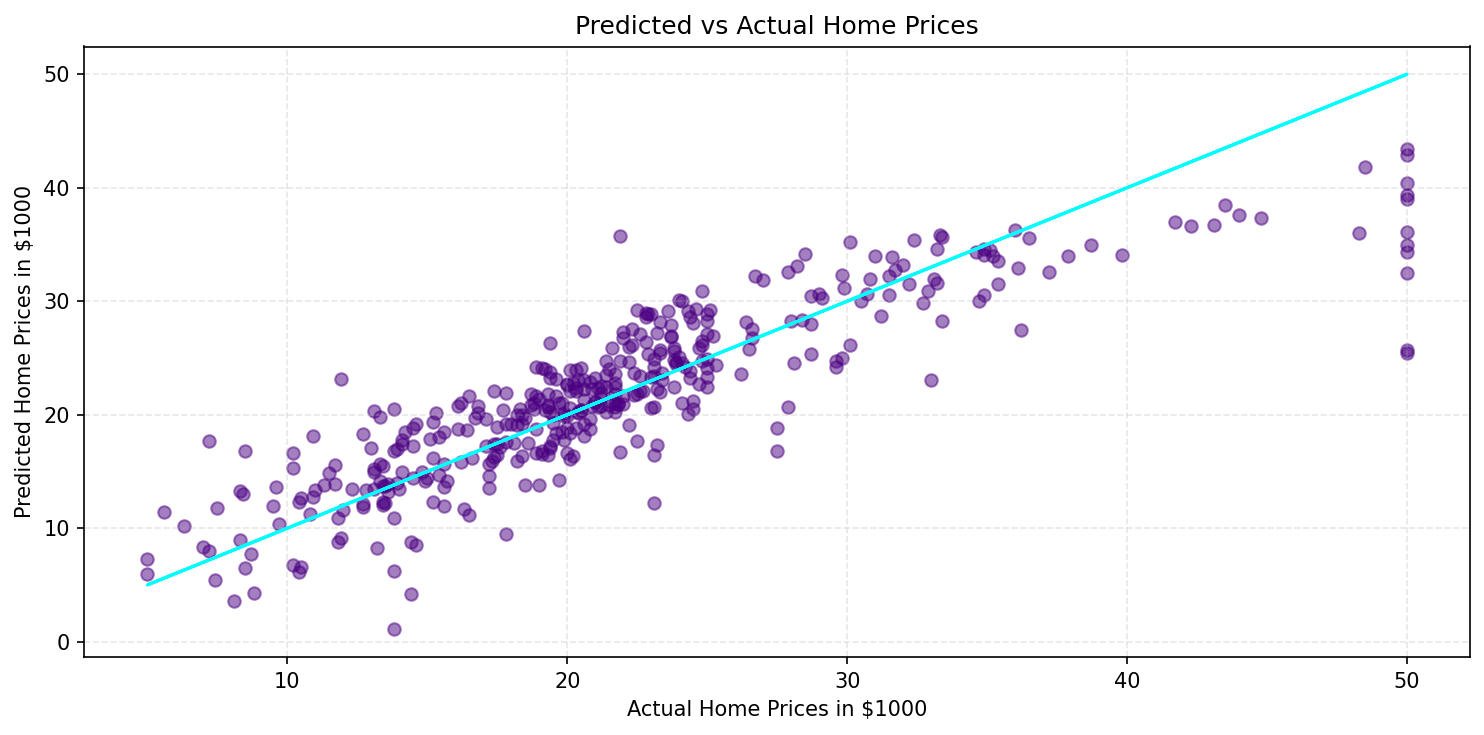

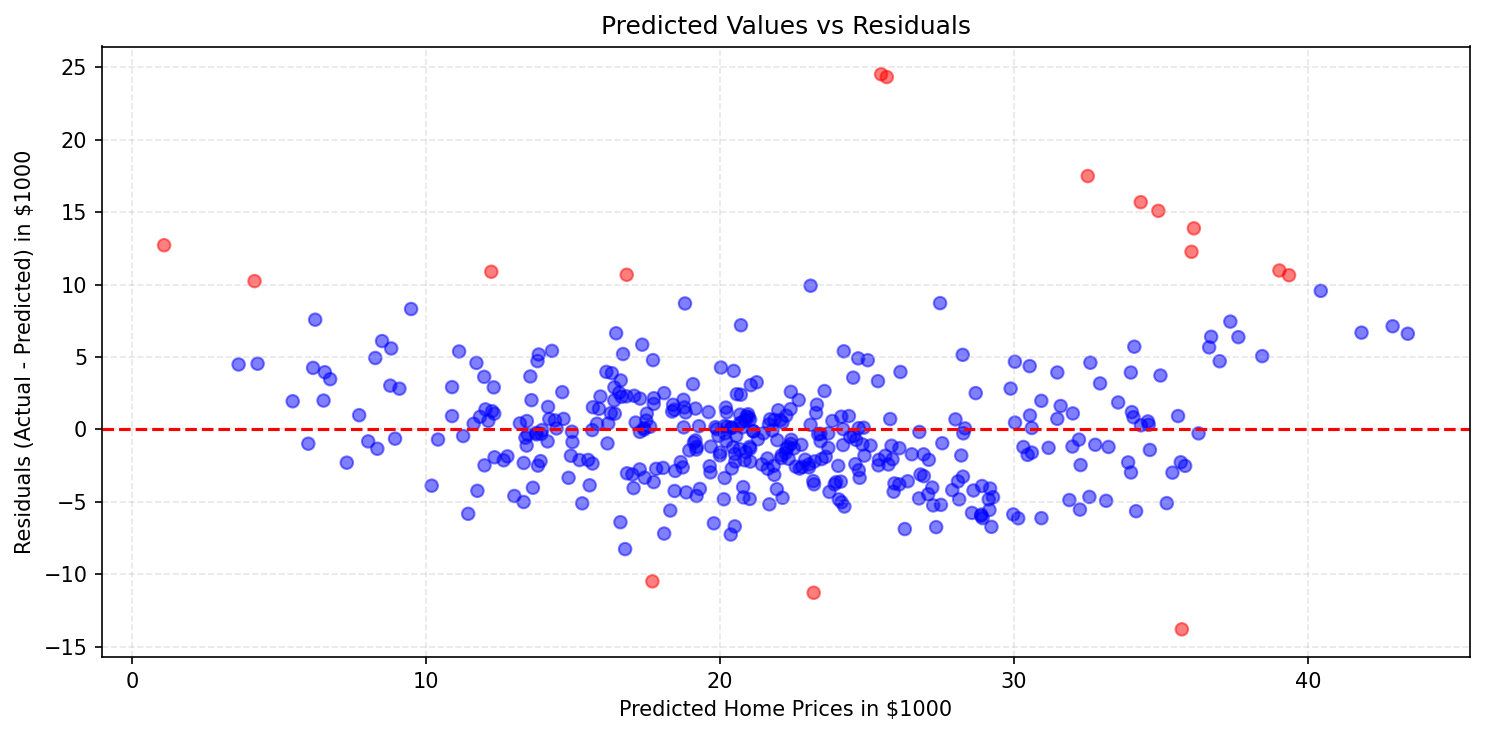

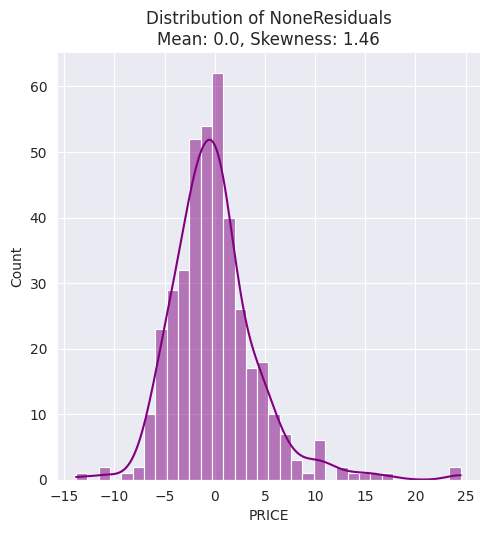

In [69]:
def gen_fig_predicted_vs_trainresult(predicted_val: np.ndarray, y_train: pd.Series) -> None:
    logging.info('Generating figure: Predicted vs Actual Home Prices.')

    # y_train = np.sort(y_train)

    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    # comparing actual values against predicted values 
    plt.scatter(
        x=y_train,
        y=predicted_val,
        color='indigo',
        alpha=0.5
    )
    plt.plot(
        y_train,
        y_train,
        color='cyan'
    )
    plt.title('Predicted vs Actual Home Prices')
    plt.xlabel('Actual Home Prices in $1000')
    plt.ylabel('Predicted Home Prices in $1000')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    logging.info('Figure generated')


def gen_fig_predict_vs_residual(predicted_val: np.ndarray, residuals: pd.Series) -> None:
    logging.info('Generating figure: Predicted Values vs Residuals.')

    # outliers are marked in red
    colors = ['red' if abs(res) > 10 else 'blue' for res in residuals]
    
    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    # comparing predicted values against residuals -> residuals are the difference between actual and predicted values
    plt.scatter(
        x=predicted_val,
        y=residuals,
        color=colors,
        alpha=0.5
    )
    plt.title('Predicted Values vs Residuals')
    plt.xlabel('Predicted Home Prices in $1000')
    plt.ylabel('Residuals (Actual - Predicted) in $1000')
    plt.axhline(0, color='red', linestyle='--')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    logging.info('Figure generated successfully.')


def gen_fig_distribution_residuals(res, title_str=None, color='purple') -> None:
    logging.info(f'Generating figure: Distribution of {title_str}Residuals.')

    res_mean = round(res.mean(), 2)
    res_skew = round(res.skew(), 2)

    # distribution of residuals
    with sns.axes_style('darkgrid'):
        sns.displot(
            res,
            kde=True,
            color=color,
        )
    plt.title(f'Distribution of {title_str}Residuals\nMean: {res_mean}, Skewness: {res_skew}')
    plt.show()

    logging.info('Figure generated successfully.')


if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    X_train, X_test, y_train, y_test = split_data_train_test(in_df)

    regr_model = train_model(X_train, X_test, y_train, y_test)

    # predicting prices in regards to the training data
    predicted_val = regr_model.predict(X_train)
    # calculating residuals against the training data
    residuals = (y_train - predicted_val)
    
    gen_fig_predicted_vs_trainresult(predicted_val, y_train)
    gen_fig_predict_vs_residual(predicted_val, residuals)
    gen_fig_distribution_residuals(residuals)
    

# Data Transformation for a Better Fit

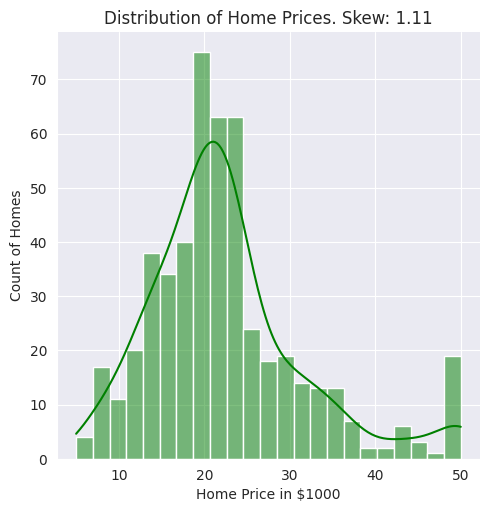

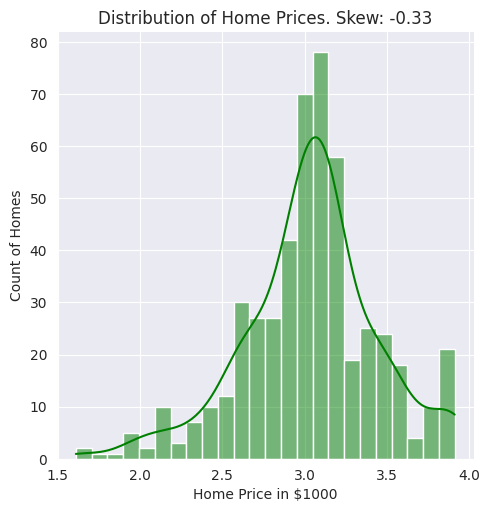

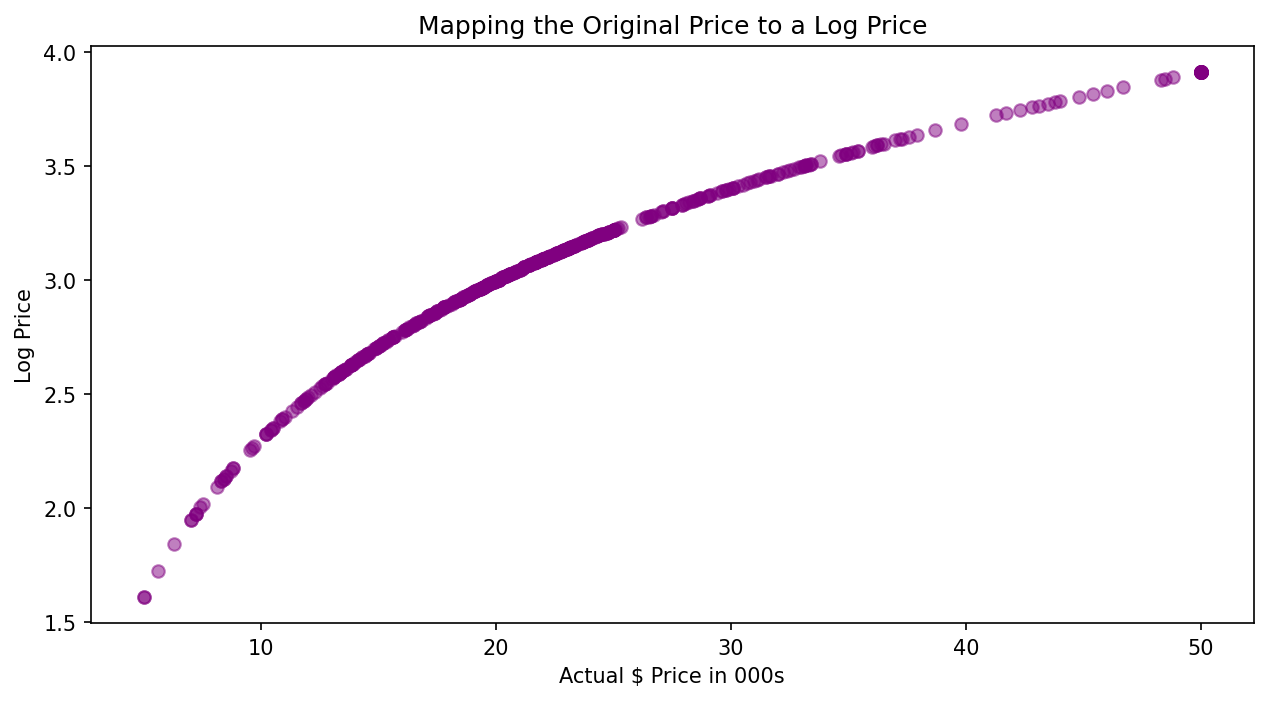

In [70]:
def gen_fig_displot(in_df: pd.DataFrame) -> None:
    logging.info('Generating figure: Distribution of Home Prices.')

    with sns.axes_style('darkgrid'):
        sns.displot(
            in_df.PRICE,
            kde=True,
            color='green'
        )
    plt.title(f'Distribution of Home Prices. Skew: {in_df.PRICE.skew():.2f}')
    plt.xlabel('Home Price in $1000')
    plt.ylabel('Count of Homes')
    plt.show()

    logging.info('Figure generated successfully.')


if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    # distribution of the home prices
    gen_fig_displot(in_df)

    # normalize distribution of the home prices
    y_log = np.log(in_df.PRICE)

    # distribution of the logarithmic home prices
    gen_fig_displot(pd.DataFrame(y_log, columns=['PRICE']))

    plt.figure(
        figsize=(10, 5),
        dpi=150
    )
    plt.scatter(
        x=in_df.PRICE,
        y=y_log,
        color='purple',
        alpha=0.5
    )
    plt.title('Mapping the Original Price to a Log Price')
    plt.ylabel('Log Price')
    plt.xlabel('Actual $ Price in 000s')
    plt.show()

# Regression and Evaluating Coefficients using Log Prices

In [71]:
if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    # normalizing the home prices
    logging.info('Normalizing the home prices by applying logarithm transformation.')
    in_df.PRICE = np.log(in_df.PRICE)

    X_train, X_test, y_train, y_test = split_data_train_test(in_df)
    regr_model = train_model(X_train, X_test, y_train, y_test)

    # the coefficients of the regression model
    regr_coef = pd.DataFrame(
        data=regr_model.coef_,
        index=X_train.columns,
        columns=['Coefficient']
    )
    print('Regression Coefficients: What changes in the feature will do to the price of a home?')
    display(regr_coef)
    

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.
Training data R-squared: 79.30%
Test data R-squared: 74.47%
Regression Coefficients: What changes in the feature will do to the price of a home?


,Coefficient
CRIM,-0.01
ZN,0.00
INDUS,0.00
CHAS,0.08
NOX,-0.70
RM,0.07
AGE,0.00
DIS,-0.05
RAD,0.01
TAX,-0.00


# Regression with Log Prices & Residual Plots

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.
Training data R-squared: 75.01%
Test data R-squared: 67.09%


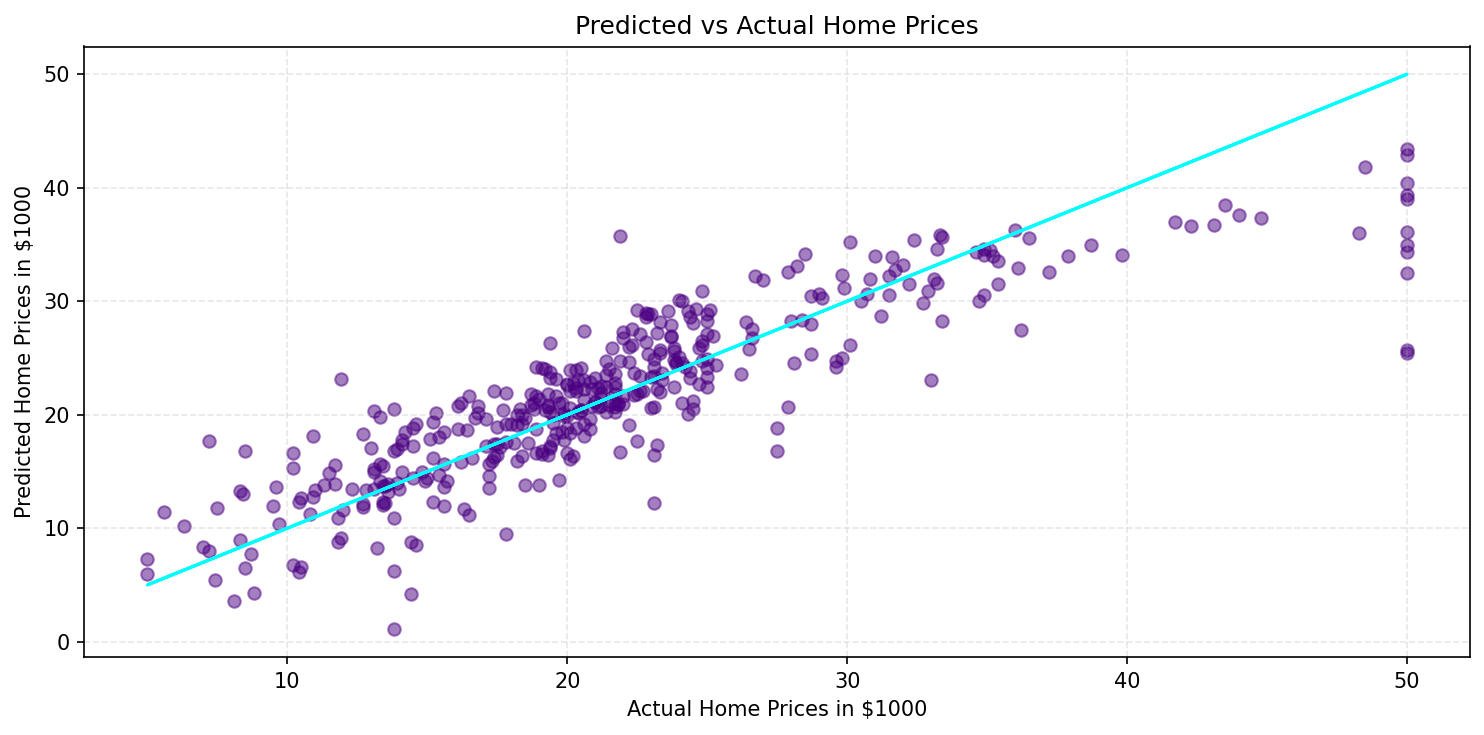

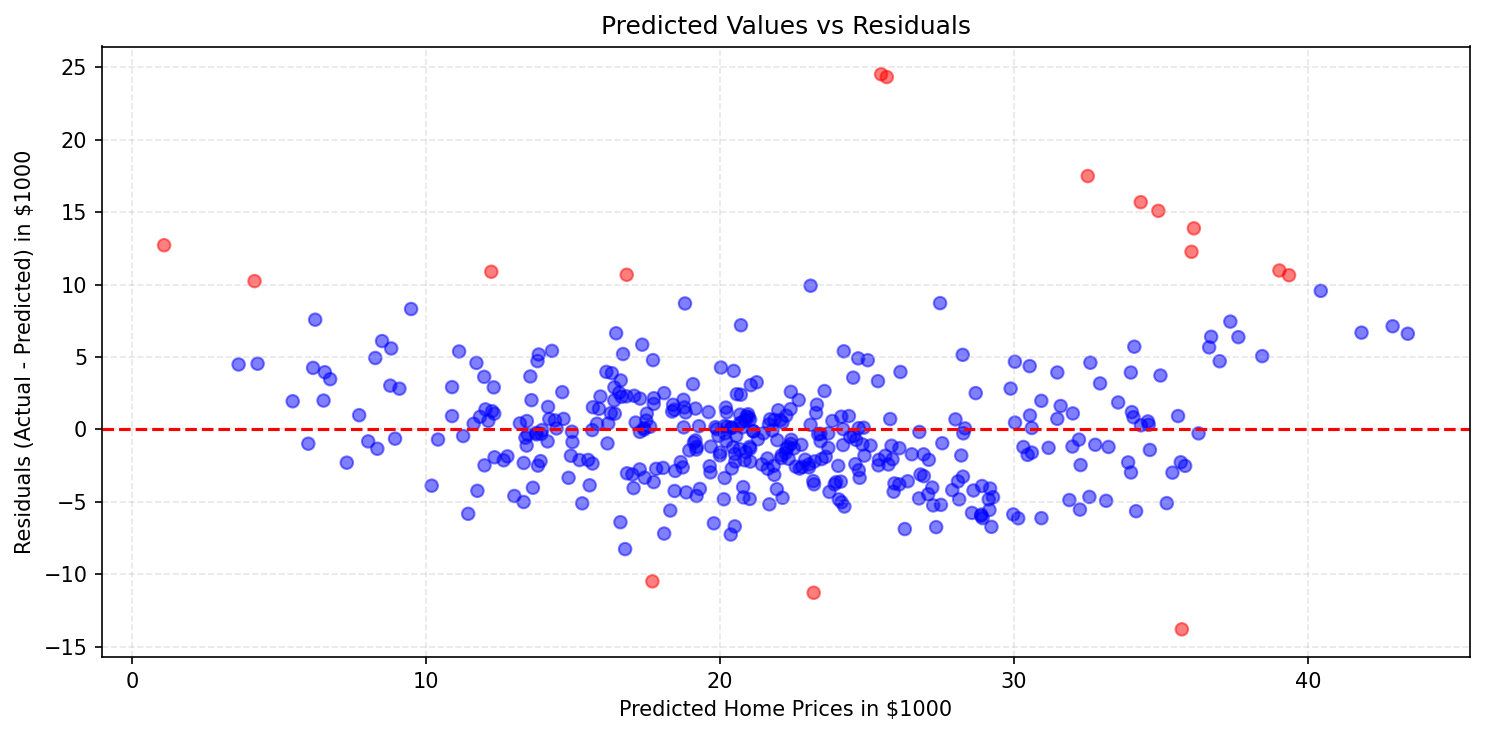

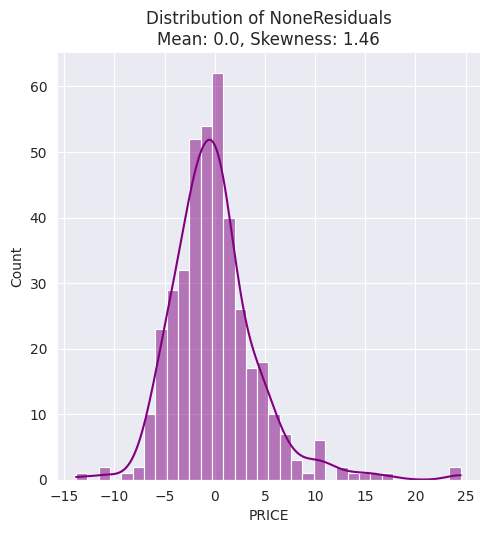

Training data is 79.8% of the total data.
Test data makes up the remaining 20.2%.
Training data R-squared: 79.30%
Test data R-squared: 74.47%


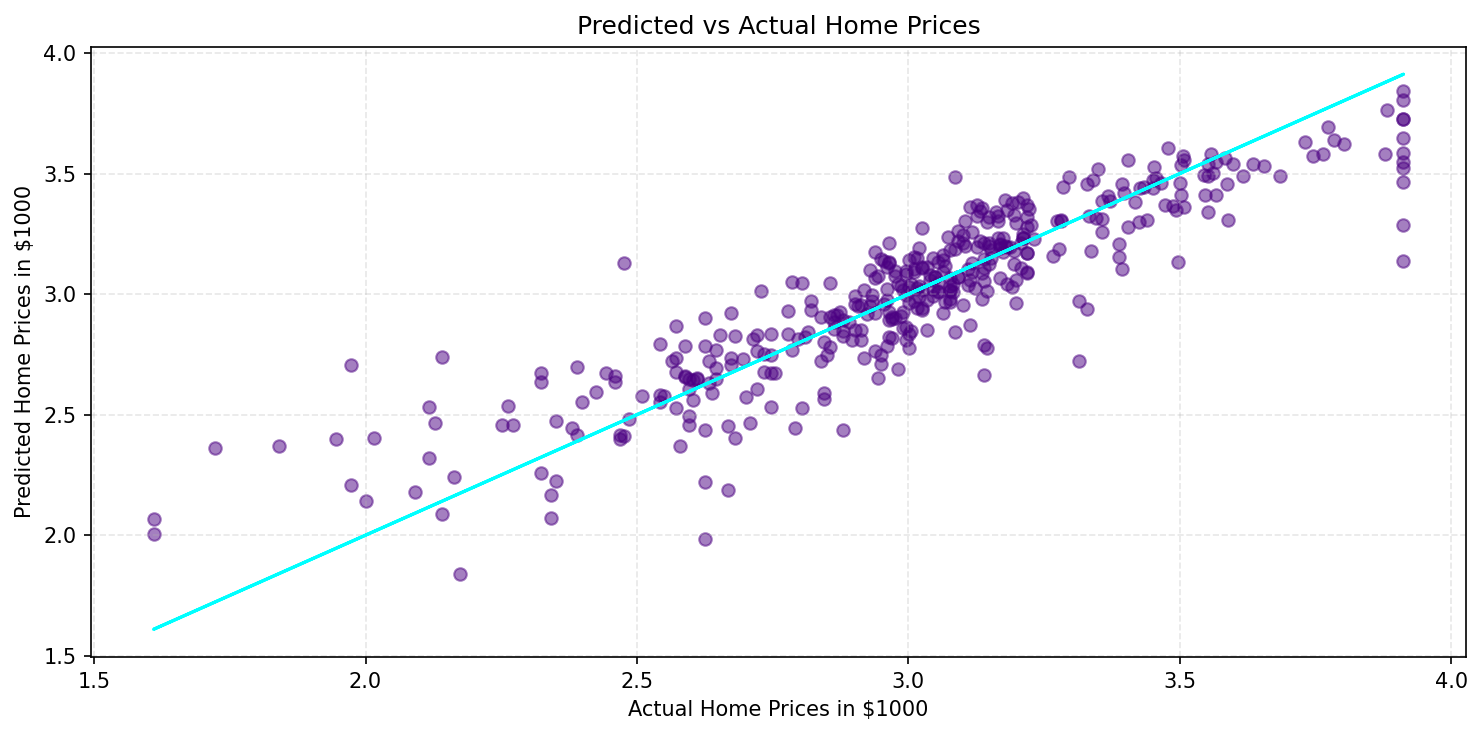

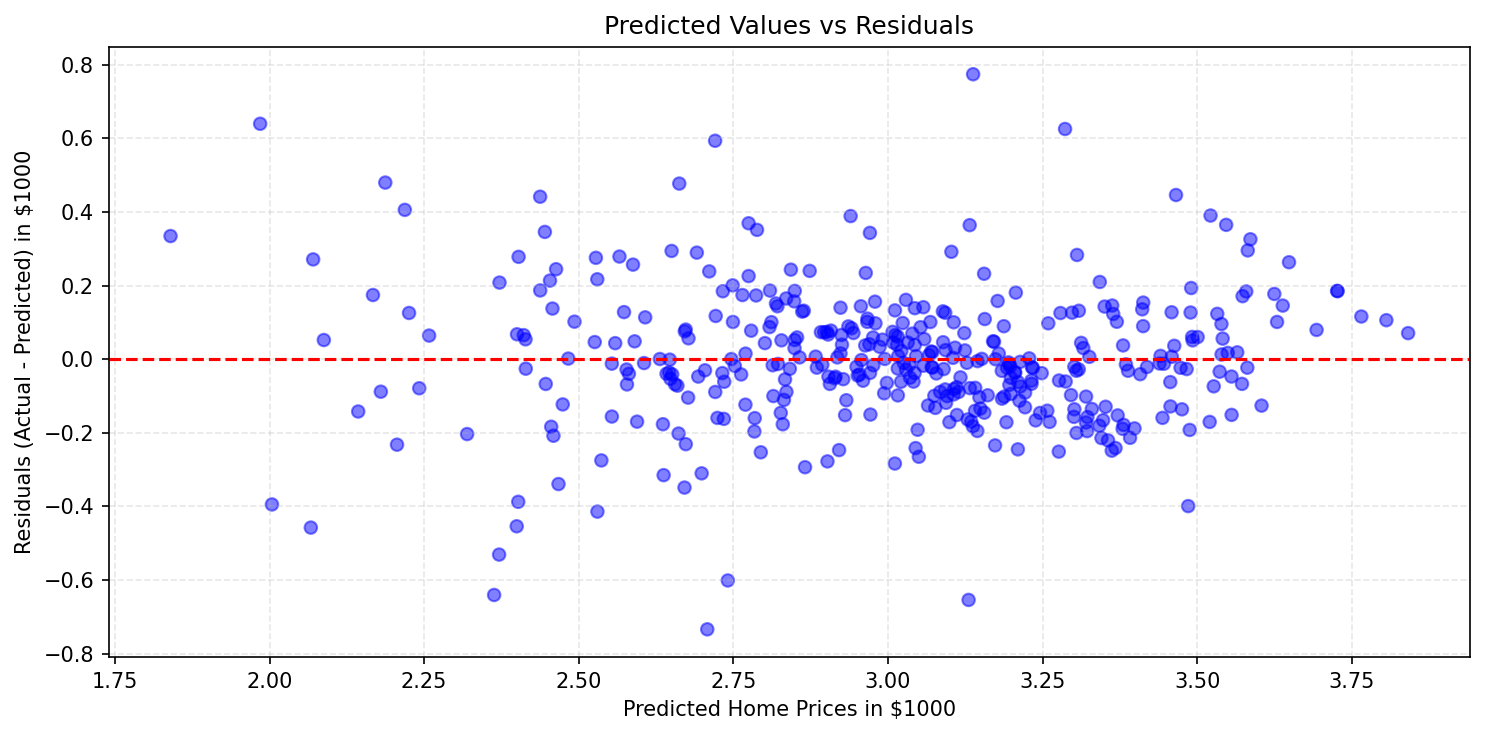

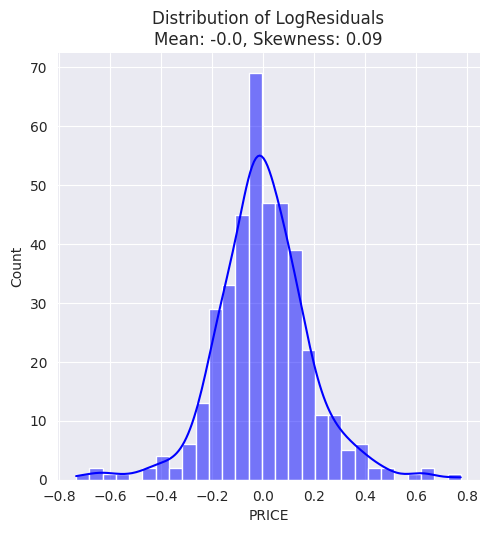

In [72]:
if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')

    in_df_log_price = in_df.copy()
    logging.info('Normalizing the home prices by applying logarithm transformation.')
    in_df_log_price.PRICE = np.log(in_df.PRICE)
    
    X_train, X_test, y_train, y_test = split_data_train_test(in_df)
    regr_model = train_model(X_train, X_test, y_train, y_test)
    # predicting prices in regards to the training data
    predicted_indf = regr_model.predict(X_train)
    # calculating residuals against the training data
    residuals_indf = (y_train - predicted_val)
    gen_fig_predicted_vs_trainresult(predicted_indf, y_train)
    gen_fig_predict_vs_residual(predicted_indf, residuals_indf)
    gen_fig_distribution_residuals(residuals_indf)

    X_train_log, X_test_log, y_train_log, y_test_log = split_data_train_test(in_df_log_price)
    regr_model_log = train_model(X_train_log, X_test_log, y_train_log, y_test_log)
    # predicting prices in regards to the log training data
    predicted_logdf = regr_model_log.predict(X_train_log)
    # calculating residuals against the log training data
    residuals_logdf = (y_train_log - predicted_logdf)
    gen_fig_predicted_vs_trainresult(predicted_logdf, y_train_log)
    gen_fig_predict_vs_residual(predicted_logdf, residuals_logdf)
    gen_fig_distribution_residuals(residuals_logdf, title_str='Log', color='blue')
    


# Compare Out of Sample Performance

In [ ]:
if __name__ == '__main__':
    setup_logging()
    in_df = fetch_df('input-81.csv')
    


